In [2]:
import numpy as np
import os
import pandas as pd
import re
from sklearn.utils import shuffle

In [3]:
## 01. Data loading
comments_df = 'Dataset/DataSource_wLabel.csv'
dataset = pd.read_csv(comments_df,  header = 1, names=['Tweets', 'Labels'])
dataset = shuffle(dataset,random_state=3)

In [4]:
## 02. Null transforming to NaN
dataset[pd.isnull(dataset)]  = 'Neutral'
print(dataset.head())

                                                  Tweets   Labels
25936                         I hate PTSD and also cops.     PTSD
20063  in my life I suffer from bipolar  serious depr...  Bipolar
14700  FREE STANDING FIRM WEBINAR  MONDAY  JUNE 1  7-...  Anxiety
11830  Yes we are struggling for our rights. Itâ€™s P...  Anxiety
17703  Former Utah State football coach Brent Guy ope...  Bipolar


In [5]:
print(dataset.describe())

                                                   Tweets      Labels
count                                               30197       30197
unique                                              29228           5
top     Trump has managed to bring back the:\n1918 Pan...  Depression
freq                                                   57        7563


In [6]:
# print out some stats about the data
print('Number of comments (twitter + facebook): ', dataset.shape[0])  # .shape[0] gives the rows 

# .unique() gives unique items in a specified column
print('Number of Categories', (len(dataset['Labels'].unique())))
print('List of Categories', ( dataset['Labels'].unique()  ) )

Number of comments (twitter + facebook):  30197
Number of Categories 5
List of Categories ['PTSD' 'Bipolar' 'Anxiety' 'Depression' 'Neutral']


In [7]:
# Data Distribution
# Show counts by Category
counts_per_category=dataset.groupby(['Labels']).size().reset_index(name="Counts")
display(counts_per_category)

,Labels,Counts
0,Anxiety,7211
1,Bipolar,5228
2,Depression,7563
3,Neutral,5068
4,PTSD,5127


<BarContainer object of 5 artists>

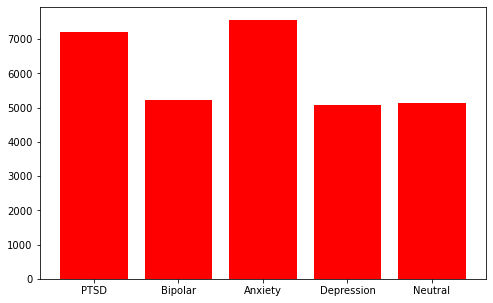

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

group = ['Labels']
counts = dataset.groupby(group).size().reset_index(name="Counts")
plt.figure(figsize=(8,5))
plt.bar(dataset['Labels'].unique(), counts['Counts'], color = 'red')


In [9]:
## 03. Functia de curatare a textului din retelele de socializare cu stemming si eliminare Stop Words
import ftfy
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

def cleanComments(corpus):
    comm_cleaned = []
    for comm in corpus:
        comm = str(comm)
        comm = ' '.join(
            re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(https:\\.*)|(www.*)|(http:\\.*)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", comm).split())
        
        comm = ftfy.fix_text(comm)
        comm = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", comm).split())

        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(comm)
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        
        comm = ' '.join(filtered_sentence)

        comm = PorterStemmer().stem(comm)

        comm_cleaned.append(comm)

    return comm_cleaned

In [10]:
def splitDataSet(dataset):
    ## Impartirea setului de date (70 % date de antrenare, 30 % date de testare)
    split_train = round(len(dataset) *0.7)
    split_validation = split_train + round(len(dataset) *0.3)
    
    ## Separarea si curatarea comentariilor
    x_train = cleanComments([x for x in dataset['Tweets'][:split_train]])
    y_train = [y for y in dataset['Labels'][:split_train]]

    x_val =cleanComments([x for x in dataset['Tweets'][split_train:split_validation]])
    y_val = [y for y in dataset['Labels'][split_train:split_validation]]
    
    return (x_train, y_train, x_val, y_val)

In [11]:
(x_train, y_train,  x_test, y_test) = splitDataSet(dataset)

In [12]:
c = {'Neutral':0, 'Depression':1, 'Bipolar':2, 'PTSD':3, 'Anxiety':4}
integer_mapping = {x: i for i,x in enumerate(c)}
y_train_one_hot= [integer_mapping[word] for word in y_train]
y_test_one_hot = [integer_mapping[word] for word in y_test]

In [13]:
## 10. Crearea unei functii de parsare a modelelor corespunzatoare invatarii automate
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
trainx = tfidf_vectorizer.fit_transform(x_train)
testx = tfidf_vectorizer.transform(x_test)

print("n_samples: %d, n_features: %d" % trainx.shape)
print("n_samples: %d, n_features: %d" % testx.shape)

n_samples: 21138, n_features: 31640
n_samples: 9059, n_features: 31640


In [14]:
feature_names = tfidf_vectorizer.get_feature_names()
dense = trainx.todense()
denselist = dense[:]
df_train = pd.DataFrame(denselist, columns=feature_names)
print(df_train.head)

<bound method NDFrame.head of         00  000  000k  000th  00748  00am  00pm   01  01000  0114  ...  zyada  \
0      0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
1      0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
2      0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
3      0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
4      0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
...    ...  ...   ...    ...    ...   ...   ...  ...    ...   ...  ...    ...   
21133  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
21134  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
21135  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
21136  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
21137  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0  

In [15]:
dense = testx.todense()
denselist = dense[:]
df_test = pd.DataFrame(denselist, columns=feature_names)
print(df_test.head)

<bound method NDFrame.head of        00  000  000k  000th  00748  00am  00pm   01  01000  0114  ...  zyada  \
0     0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
1     0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
2     0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
3     0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
4     0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
...   ...  ...   ...    ...    ...   ...   ...  ...    ...   ...  ...    ...   
9054  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
9055  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
9056  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
9057  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   
9058  0.0  0.0   0.0    0.0    0.0   0.0   0.0  0.0    0.0   0.0  ...    0.0   

      zyd

In [16]:
from sklearn.decomposition import TruncatedSVD  

truncatedSVD = TruncatedSVD(300)
X_train_truncated = truncatedSVD.fit_transform(trainx)
X_test_truncated = truncatedSVD.transform(testx)
 
print(X_train_truncated.shape)

(21138, 300)


In [17]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_train_truncated)
x_test_scaled = scaler.transform(X_test_truncated)

In [18]:
def make_csv(x, y, filename, data_dir):
    '''Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
       '''
    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    
    # your code here
    pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1) \
        .to_csv(os.path.join(data_dir, filename), header=True, index=False)
    
    # nothing is returned, but a print statement indicates that the function has run
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [18]:
import pickle
import joblib
df_train_all = pd.concat([pd.DataFrame(y_train_one_hot), pd.DataFrame(df_train)], axis=1)
with open('Dataset/Train_Dataset.pickle', 'wb') as handle:
    pickle.dump(df_train_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
df_test_all = pd.concat([pd.DataFrame(y_test_one_hot), pd.DataFrame(df_test)], axis=1)
with open('Dataset/Test_Dataset.pickle', 'wb') as handle:
    pickle.dump(df_test_all, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
make_csv(x_train_scaled, y_train_one_hot, filename='Scaled_Train_Dataset.csv', data_dir='Dataset')
make_csv(x_test_scaled, y_test_one_hot, filename='Scaled_Test_Dataset.csv', data_dir='Dataset')

Path created: Dataset/Scaled_Train_Dataset.csv
Path created: Dataset/Scaled_Test_Dataset.csv


In [28]:
x_train_scaled.shape
# x_train_scaled[0]

(21138, 300)

In [26]:
x_test_scaled.shape

(9059, 300)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_recall_fscore_support
## 0.7 Definirea functiei ce exporta intr-un fisier csv raportul de clasificare al modelelor
def classification_report_to_csv(ground_truth, predictions, full_path):

    labels = unique_labels(ground_truth, predictions)

    precision, recall, f_score, support = precision_recall_fscore_support(ground_truth, predictions, labels=labels, average=None)
    
    results_pd = pd.DataFrame({"class": labels, "precision": precision, "recall": recall, "f_score": f_score, "support": support})

    results_pd.to_csv(full_path, index=False)
    
 ## 0.8 Definirea  functiei de antrenare al modelului   
def model(model,title,X_train,y_train, X_test, y_test):
    classifier = model
    ## Monitorizarea timpului de executie pentru fiecare model antrenat    
    start = time.process_time()
    trainedmodel=classifier.fit(X_train, y_train)
    print(time.process_time() - start)
    
    y_pred = classifier.predict(X_test)
    ## Afisarea valorii acuratetei modelului
    print('Pentru modelul #', str(title) ,accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    ## Crearea unui fisier csv cu scorurile modelului - pentru partea de raportare   
    classification_report_to_csv(y_test, y_pred,str(title)+'_CR'+'.csv')

    return trainedmodel

In [ ]:
## 13.1 NAIVE BAYES MULTINOMIAL Standard
from sklearn.naive_bayes import MultinomialNB
import time
#trainedMultinomialNB = model(MultinomialNB(),'MultiNomial NB standard',X_truncated,y_train_one_hot,X_test_truncated,y_test_one_hot)
from sklearn.ensemble import RandomForestClassifier
## 11.2 RANDOM FOREST - antrenare cu diferiti parametri
trainedRandomForest_standard = model(RandomForestClassifier(), 'Random forest standard', trainx,y_train_one_hot,testx,y_test_one_hot)
# trainedRandomForest_1 = model(RandomForestClassifier(n_estimators=280,criterion='gini',min_samples_split=18), 'Random forest 1', trainx,y_train_one_hot,testx,y_test_one_hot)


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

trainedXGB = model(XGBClassifier(max_depth=10, n_estimators=300, nthread= 3), 'XGB', trainx,y_train_one_hot,testx,y_test_one_hot)

In [ ]:
from sklearn.neighbors import NearestCentroid
trainedRocchio = model(NearestCentroid(),'Rocchio',trainx,y_train_one_hot,testx,y_test_one_hot)

In [ ]:
trainedMultinomialNB = model(MultinomialNB(alpha=0.5,fit_prior=False),'MultiNomial NB standard',trainx,y_train_one_hot,testx,y_test_one_hot)

In [ ]:
from sklearn.svm import LinearSVC
trainedSVC = model(LinearSVC(multi_class= 'crammer_singer',max_iter= 10000,class_weight = 'balanced',dual = False), 'Linear SVC', X_truncated, y_train_one_hot, X_test_truncated, y_test_one_hot)

In [ ]:
from sklearn.svm import LinearSVC
trainedSVC = model(LinearSVC(multi_class= 'ovr', max_iter= 10000,class_weight = 'balanced'), 'Linear SVC', trainx, y_train_one_hot, testx, y_test_one_hot)

In [ ]:
from sklearn.svm import LinearSVC
trainedSVC = model(LinearSVC(multi_class= 'ovr', max_iter= 10000,class_weight = 'balanced'), 'Linear SVC', x_train_scaled, y_train_one_hot, x_test_scaled, y_test_one_hot)

In [ ]:
trainedXGB_standard = model(XGBClassifier(), 'XGB standard', trainx,y_train_one_hot,testx,y_test_one_hot)

In [ ]:
trained_KNN = model(KNeighborsClassifier(), 'KNN', x_train_scaled,y_train_one_hot,x_test_scaled,y_test_one_hot)   

In [ ]:
trained_ExtraTrees = model(ExtraTreesClassifier(n_estimators=100), 'Extra Trees', x_train_scaled,y_train_one_hot,x_test_scaled,y_test_one_hot) 

In [ ]:
trained_KNN = model(KNeighborsClassifier(n_neighbors=5), 'KNN', trainx,y_train_one_hot,testx,y_test_one_hot)   

In [ ]:
trained_RF = model(RandomForestClassifier(n_estimators=300), 'RF', trainx,y_train_one_hot,testx,y_test_one_hot)   

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
trained_ExtraTrees = model(ExtraTreesClassifier(n_estimators=5), 'Extra Trees', trainx,y_train_one_hot,testx,y_test_one_hot)   

In [ ]:
from sklearn.tree import DecisionTreeClassifier
trained_DT = model(DecisionTreeClassifier(), 'Decision Tree', trainx,y_train_one_hot,testx,y_test_one_hot)   

In [ ]:
trained_DT = model(DecisionTreeClassifier(), 'Decision Tree', x_train_scaled,y_train_one_hot,x_test_scaled,y_test_one_hot)   

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D, Flatten
from keras.preprocessing.sequence import pad_sequences
conv_layers = [[128, 7, 3], [128, 5, -1], [128, 3, -1], [128, 3, 3]]

embedding_weights = X_truncated
vocab_size = X_truncated.shape[0]
embedding_size = X_truncated.shape[1]
print("embedding weights shape: ", embedding_weights.shape)
# print("embedding weights: \n", embedding_weights)

input_size = embedding_size
num_of_classes = 5
dropout_p = 0.2
optimizer = 'adam'
loss = "sparse_categorical_crossentropy"

def build_model():
    ## 17. Crearea modelului folosind constructorul Sequential
    model = Sequential()

    ## 17.1 Primul strat al retelei convolutionale: Embedding Layer
    model.add(Embedding(vocab_size, embedding_size, input_length=input_size, weights=[embedding_weights]))

    ## 17.2 Adaugarea celor 4 straturi convolutionale si a celor 2 straturi de agregare
    for filter_num, filter_size, pooling_size in conv_layers:
        model.add(Conv1D(filter_num, filter_size, activation='relu'))
        if pooling_size != -1:
            model.add(MaxPooling1D(pool_size=pooling_size,strides = 3))

    ## 17.3 Stratul dintre cel convolutional si cel dens este de tip flatten
    model.add(Flatten())

    ## 17.4 Adaugarea stratului de neuroni complet conectati
    model.add(Dense(256, activation='relu'))

    ## 17.5 Pentru a evita supra-ajutarea modelului, am eliminat aleator 20% neuroni
    model.add(Dropout(dropout_p))

    ## 17.6 Adaugarea ultimului strat de tip dens, ce calculeaza probabilitatea claselor cu ajutorul functiei de activare softmax 
    model.add(Dense(5, activation='softmax'))

    ## 17.7 Compilarea modelului cu optimizatorul "adam", functia de minimizare a erorii de "sparse_categorical_crossentropy"
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    ## 17.8 Afisarea detaliilor retelei create
    model.summary()

    return model

In [ ]:
## 18. Antrenarea si evaluarea modelului creat 
y_test_one_hot= np.array(y_test_one_hot)
y_train_one_hot = np.array(y_train_one_hot)

model_dp = build_model()

In [ ]:
## 19. Antrenarea retelei convolutionale si afisarea timpului de antrenare
start = time.process_time()

history = model_dp.fit(X_truncated, y_train_one_hot, validation_data=(X_test_truncated, y_test_one_hot), batch_size=64, epochs=5, verbose=False)

print(time.process_time() - start)

In [ ]:
from sklearn.neural_network import MLPClassifier
start = time.process_time()
clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train_scaled, y_train_one_hot)
print(time.process_time() - start)

In [ ]:
clf.score(x_test_scaled, y_test_one_hot)

In [ ]:
start = time.process_time()
clf_truncated = MLPClassifier(random_state=1, max_iter=300).fit(X_truncated, y_train_one_hot)
print(time.process_time() - start)

In [ ]:
clf_truncated.score(X_test_truncated, y_test_one_hot)

In [ ]:
start = time.process_time()
clf_vectorized = MLPClassifier(random_state=1, max_iter=300).fit(trainx, y_train_one_hot)
print(time.process_time() - start)

In [ ]:
clf_vectorized.score(testx, y_test_one_hot)

In [ ]:
## 20. Salvarea retelei neuronale convolutionale antrenate intr-un fisier de tip json
from tensorflow.keras.models import model_from_json
data_dir = 'result/CNN'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    
model_json = model_dp.to_json()
with open('result/CNN/model_CNN.json', "w") as json_file:
    json_file.write(model_json)
    
## 21. Salvarea ponderilor retelei intr-un fisier de tip HDF5
model_dp.save_weights('result/CNN/model_CNN.h5')
print("Modelul s-a salvat cu succes")


In [ ]:
## 22. Testarea retelei convolutionale
loss, accuracy = model_dp.evaluate(X_test_truncated, y_test_one_hot, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

predict_labels = model_dp.predict(X_test_truncated)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_train_scaled = scaler.fit_transform(X_truncated)
x_test_scaled = scaler.transform(X_test_truncated)

In [ ]:
# print(X_truncated[0])
print(len(x_train_scaled[0]))
# print(y_train_one_hot[0])

In [ ]:
print(y_test_one_hot)

In [ ]:
 ## 23. Crearea raportului de sinteza al retelei 
final_label_prediction=[]

for j in range(0,len(predict_labels)):
    max= 0
    for i in range(0,len(predict_labels[j])):
        if predict_labels[j][i] > max:
            max = predict_labels[j][i]
            i_max= i
    final_label_prediction.append(i_max)

## 23.1 Crearea si salvarea raportului de clasificare al retelei neuronale
print(classification_report(y_test_one_hot, final_label_prediction))
# classification_report_to_csv(y_test_one_hot, final_label_prediction,'CNN_CR.csv')

## 23.2 Crearea si stocarea intr-un fisier csv a matricei de confuzie al CNN
y_true = pd.Series(y_test_one_hot, name="Actual")
y_pred = pd.Series(final_label_prediction, name="Predicted")
df_confusion = pd.crosstab(y_true, y_pred)
print (df_confusion)
# df_confusion.to_csv('../result/CNN/Matriceadeconfuzie.csv')


# ## 24. Incarcarea modelului json si recrearea modelului CNN
# json_file = open('../result/CNN/model_CNN.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

# ## 24.1 Incarcarea ponderilor retelei convolutionale create
# loaded_model.load_weights('../result/CNN/model_CNN.h5')
# print("Incarcarea modelului de pe disk")
# model_CNN = model_from_json(loaded_model_json)
